In [1]:
#!unzip '/content/drive/MyDrive/archive (2).zip' && rm '/content/drive/MyDrive/archive (2).zip'

Archive:  /content/drive/MyDrive/archive (2).zip
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (214)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (219)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (224)_iaip.jp

In [15]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/test'

In [17]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [19]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train/*')

In [20]:
len(folders)

4

In [21]:
x = Flatten()(resnet.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [23]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [24]:
# tell the model what loss and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [27]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [28]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
122/122 [==============================] - 371s 3s/step - loss: 2.1399 - accuracy: 0.4511 - val_loss: 2.0724 - val_accuracy: 0.3679
Epoch 2/20
122/122 [==============================] - 369s 3s/step - loss: 1.4924 - accuracy: 0.5469 - val_loss: 1.3435 - val_accuracy: 0.6509
Epoch 3/20
122/122 [==============================] - 370s 3s/step - loss: 1.0604 - accuracy: 0.6125 - val_loss: 1.2534 - val_accuracy: 0.6887
Epoch 4/20
122/122 [==============================] - 365s 3s/step - loss: 1.2876 - accuracy: 0.5771 - val_loss: 3.0922 - val_accuracy: 0.5755
Epoch 5/20
122/122 [==============================] - 366s 3s/step - loss: 0.9858 - accuracy: 0.6602 - val_loss: 0.9359 - val_accuracy: 0.6226
Epoch 6/20
122/122 [==============================] - 367s 3s/step - loss: 1.0781 - accuracy: 0.6427 - val_loss: 0.7472 - val_accuracy: 0.6792
Epoch 7/20
122/122 [==============================] - 366s 3s/step - loss: 0.8446 - accuracy: 0.6843 - val_loss: 1.5276 - val_accuracy: 0.6321

In [29]:
import matplotlib.pyplot as plt

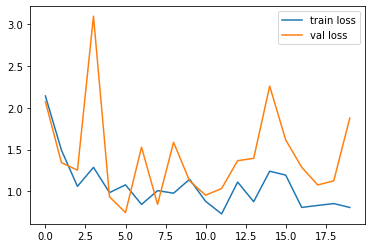

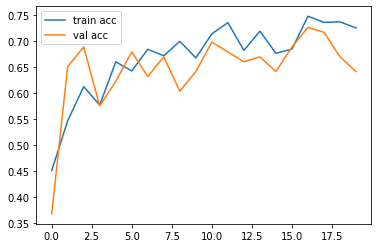

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
# save it as a h5 file

model.save('model_resnet50.h5')

In [32]:
y_pred = model.predict(test_set)

7/7 [==============================] - 21s 3s/step


In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([1, 1, 0, 2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2,
       1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2])

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_resnet50.h5')

In [37]:
img=image.load_img('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/val/fresh cotton leaf/d (119)_iaip.jpg',target_size=(224,224))

In [38]:
x=image.img_to_array(img)
x

array([[[202., 246., 171.],
        [203., 247., 172.],
        [204., 248., 173.],
        ...,
        [137., 200., 119.],
        [122., 201., 110.],
        [125., 204., 113.]],

       [[206., 248., 174.],
        [203., 245., 171.],
        [200., 242., 168.],
        ...,
        [163., 226., 145.],
        [161., 229., 142.],
        [152., 220., 133.]],

       [[210., 248., 175.],
        [213., 251., 178.],
        [215., 253., 180.],
        ...,
        [160., 223., 142.],
        [164., 222., 138.],
        [161., 219., 135.]],

       ...,

       [[108., 198.,  84.],
        [110., 200.,  86.],
        [112., 202.,  88.],
        ...,
        [132., 126., 114.],
        [120., 129., 110.],
        [135., 144., 125.]],

       [[110., 200.,  86.],
        [112., 202.,  88.],
        [114., 204.,  90.],
        ...,
        [125., 130., 108.],
        [116., 123., 105.],
        [104., 111.,  95.]],

       [[108., 198.,  84.],
        [110., 200.,  86.],
        [112., 2

In [39]:
x=x/255

In [40]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[4.4981927e-02, 3.6532291e-23, 9.5501810e-01, 4.6710087e-27]],
      dtype=float32)

In [43]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 210ms/step


array([2])

In [44]:
if a==0:
   print("The leaf is diseased cotton leaf")
elif a==1:
   print("The leaf is diseased cotton plant")
elif a==2:
   print("The leaf is fresh cotton leaf")
else:
   print("The leaf is fresh cotton plant")

The leaf is fresh cotton leaf
